In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
data=pd.read_csv('german_credit_data.csv')

data.head(-2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
993,993,30,male,3,own,little,little,3959,36,furniture/equipment
994,994,50,male,2,own,NaN,NaN,2390,12,car
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car


In [3]:
data.info()
print(f'-----\n{data.dtypes.value_counts()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
-----
int64     5
object    5
dtype: int64


In [4]:
#Let's look the NaN data.
data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
#fill them with 'Unknown'
data['Saving accounts']=data['Saving accounts'].fillna('Unknown')
data['Checking account']=data['Checking account'].fillna('Unknown')

#Let's check
data.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [6]:
#unnamed:0 column is a necessary.

data.drop(['Unnamed: 0'],axis=1,inplace=True)

data.sample(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
706,24,male,2,own,moderate,moderate,6560,48,car
329,28,male,2,own,little,moderate,1068,6,radio/TV
511,32,male,3,free,little,Unknown,4686,36,car
508,28,male,2,own,little,Unknown,1413,24,radio/TV
989,48,male,1,own,little,moderate,1743,24,radio/TV


## EDA

In [7]:
values=data['Purpose'].value_counts()
values

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [8]:
names=data['Purpose'].unique()
names

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [9]:
#First of all we are starting with Purpose
values=data['Purpose'].value_counts()
names=names=data['Purpose'].unique()

fig = px.pie(data, values=values, names=names)
fig.show()

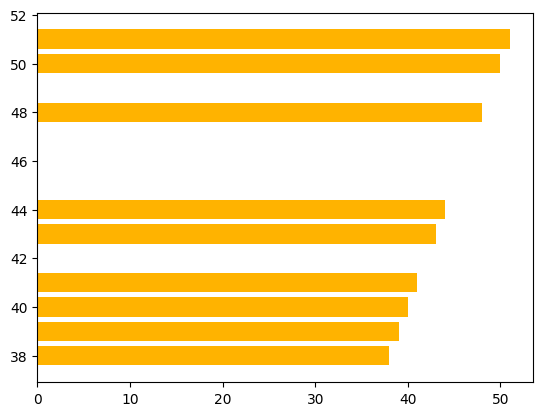

In [10]:
#For age column, Most values: 10 row

ages=data['Age'].value_counts()[:10]
Numbers=ages.values

#it's horizontal!
plt.barh(ages,Numbers,color='#FFB300')
plt.show()

In [11]:

jobs=data['Job'].value_counts()
Namesofjobs=jobs.index

Namesofjobs=Namesofjobs.astype(str)
jobs.values,Namesofjobs


(array([630, 200, 148,  22], dtype=int64),
 Index(['2', '1', '3', '0'], dtype='object'))

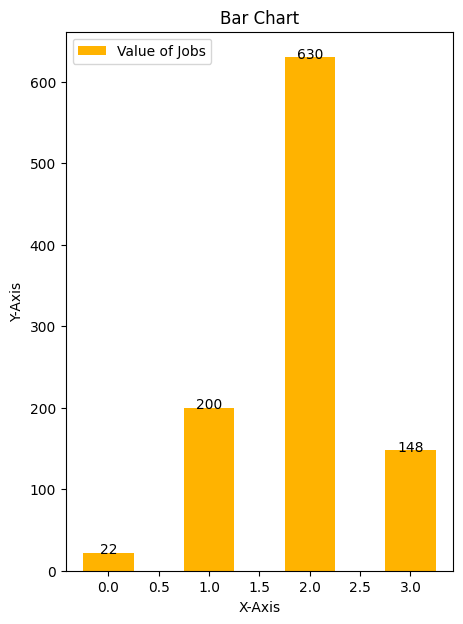

In [12]:
#Target Column: Job

jobs=data['Job'].value_counts()
Namesofjobs=jobs.index

plt.figure(figsize=(5,7))
plt.bar(Namesofjobs,jobs.values,label='Value of Jobs',width = 0.5, color = '#FFB300')

plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Bar Chart')

#for x,y in zip(x1-object,y1-int):
for x, y in zip(Namesofjobs,jobs.values):
    plt.text(x, y - 5, '%d' % y, ha = 'center', va = 'bottom')#rakamları ortaya, isimleri bar'ın altına yaz diyoruz.

plt.legend()

plt.show()

<Figure size 2200x1400 with 0 Axes>

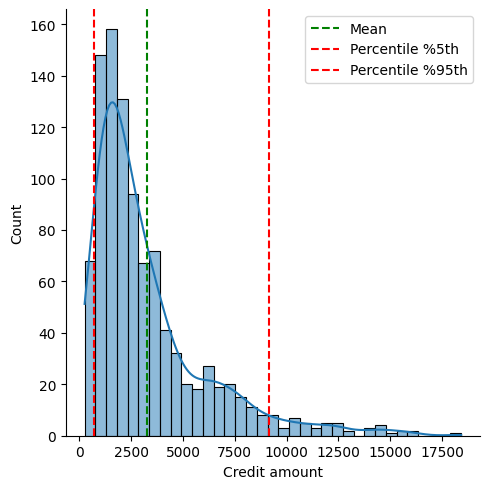

In [13]:
#Target Column: Credit amount
#For Outlier analysis.

plt.figure(figsize=(22,14))

sns.displot(data['Credit amount'],kde=True)

# %5  %95 outlier red lines
plt.axvline(x=np.mean(data['Credit amount']),c='green',ls='--',label='Mean')
plt.axvline(x=np.percentile(data['Credit amount'],5),c='red',ls='--',label='Percentile %5th')
plt.axvline(x=np.percentile(data['Credit amount'],95),c='red',ls='--',label='Percentile %95th')

plt.legend()
plt.show()

#### Bivariate Analysis

Don't forget it. you can capture correlation relationships using this table.


![Alt text](../45.png)

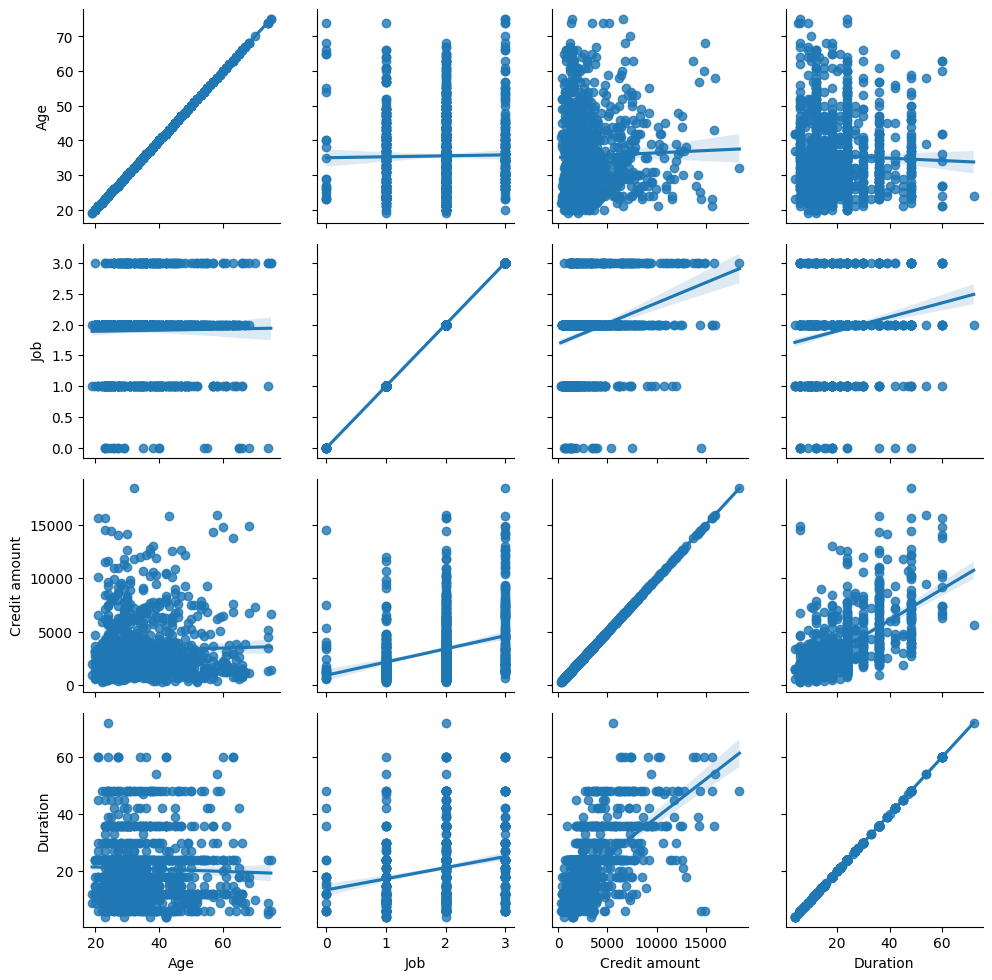

In [14]:
g=sns.PairGrid(data=data)
g.map(sns.regplot)

<Axes: ylabel='Credit amount'>

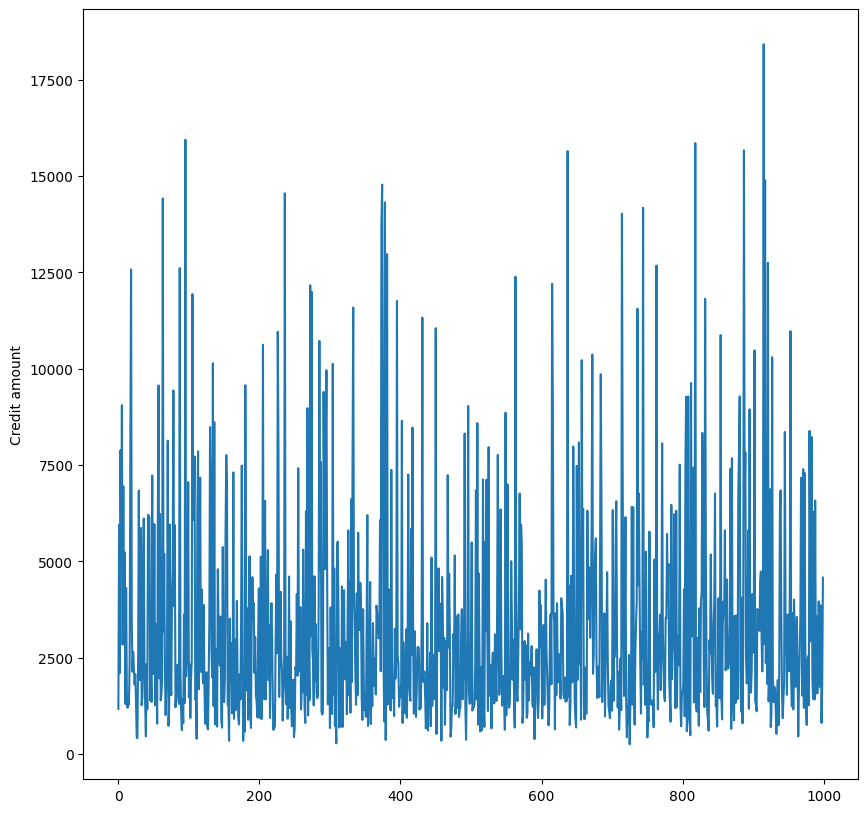

In [15]:
plt.figure(figsize=(10,10))
sns.lineplot(x=data.groupby(data.index).mean()['Duration'].index,y=data.groupby(data.index).mean()['Credit amount'])

<Axes: xlabel='Sex', ylabel='Credit amount'>

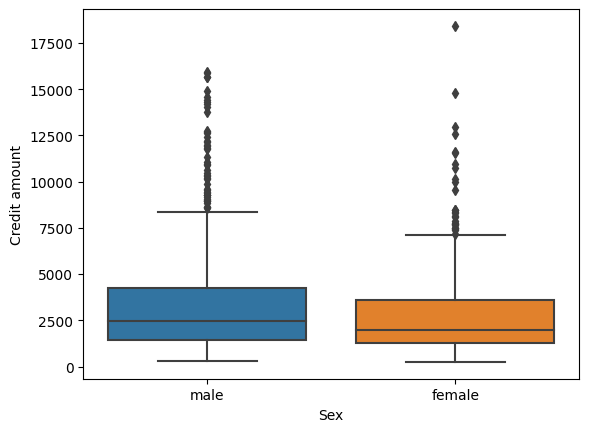

In [16]:
sns.boxplot(data = data, x = 'Sex', y = 'Credit amount')

## Statistical concepts

In [18]:
def mean(values):

    #toplam değişkeni
    total=0

    #list her bir değişkeni al ve total'a ekle.
    for a in values:
      total+=a
    
    #total/listİçindekiElemanSayısı
    return total/len(values)


def covariance(x_values, y_values):
    """
    Calculate the covariance between two lists of values.

    Parameters:
    x_values (list): A list of numeric values.
    y_values (list): A list of numeric values.

    Returns:
    float: The covariance value.
    """

    #Olasılık teorisi ve istatistikte, kovaryans iki değişkenin birlikte ne kadar değiştiklerinin ölçüsüdür.
    # Kovaryans, iki değişkenin birlikte nasıl değiştiğini belirtirken, korelasyon katsayısı ise ilişkinin gücünü ve yönünü standartlaştırılmış bir şekilde ifade eder.
        
    N=len(x_values)

    xOrtalama=mean(x_values)
    yOrtalama=mean(y_values)

    #variance'ları hesaplama
    sub_x=[i - xOrtalama for i in x_values]
    sub_y=[i - yOrtalama for i in y_values]

    #covariance formülü
    cov=sum([sub_y[i]*sub_x[i] for i in range(N)])

    # N-1'e bölerek kovaryans değeri döndürülür.
    return cov/(N - 1)

In [25]:
covariance(data['Duration'],data['Credit amount'])

21273.74977577579

In [26]:
#But The eaist way



"""
You should check this ranking before you are sure of the result;

cov(x,x)  cov(x,y)

cov(x,y)  cov(y,y)

"""

print(np.cov(data['Job'],data['Credit amount']))

'\nYou should check this ranking before you are sure of the result;\n\ncov(x,x)  cov(x,y)\n\ncov(x,y)  cov(y,y)\n\n'

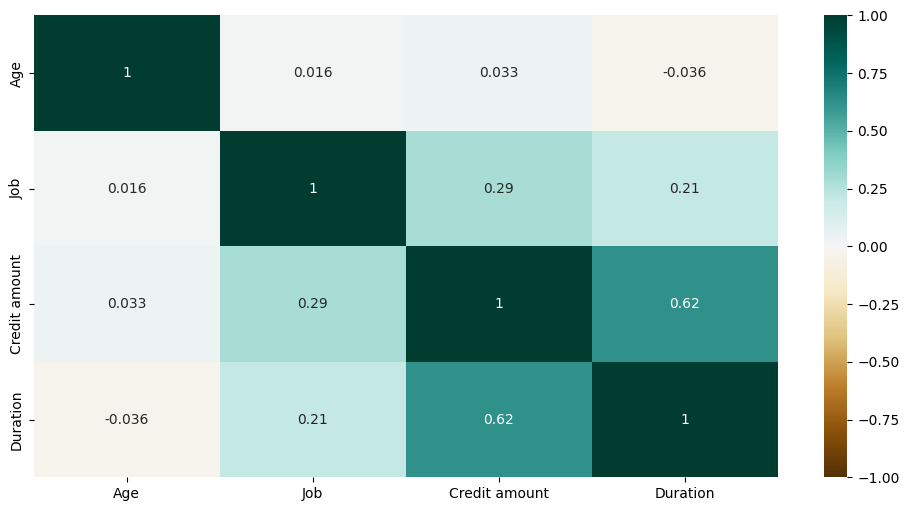

In [24]:
#Corelation with sns.map

def Corr(data):
    plt.figure(figsize=(12,6))
    heatmap=sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG")
    plt.show()

Corr(data)

In [ ]:
#Done!